# Format clinical steady state warfarin data

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Import data

In [2]:
directory = os.getcwd()
data_raw = pd.read_csv(
    directory + '/raw_data/clinical_steady_state_INR_data_extracted_data.csv',
    header=0, usecols=list(range(67)), nrows=5700)
data_raw

,PharmGKB Subject ID,PharmGKB Sample ID,Project Site,Gender,Race (Reported),Race (OMB),Ethnicity (Reported),Ethnicity (OMB),Age,Height (cm),...,VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,VKORC1 QC genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,CYP2C9 consensus,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus
0,PA135312261,PA135312629,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,193.04,...,NaN,NaN,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN
1,PA135312262,PA135312630,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,176.53,...,NaN,C/C,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C
2,PA135312263,PA135312631,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,40 - 49,162.56,...,NaN,NaN,*1/*1,G/G,T/T,NaN,G/G,A/G,NaN,NaN
3,PA135312264,PA135312632,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,182.24,...,NaN,NaN,*1/*1,A/G,G/T,NaN,C/G,G/G,NaN,NaN
4,PA135312265,PA135312633,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,167.64,...,NaN,NaN,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,PA152407681,PA152407969,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,20 - 29,185.42,...,NaN,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5696,PA152407682,PA152407970,21,female,White,White,not Hispanic or Latino,not Hispanic or Latino,70 - 79,160.02,...,NaN,NaN,*1/*3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5697,PA152407683,PA152407971,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,187.96,...,NaN,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5698,PA152407684,PA152407972,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,177.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For this study we are not interested in drug-drug interactions, so let's
reduce the dataset to the relevant columns.

In [3]:
data = data_raw[[
    'PharmGKB Subject ID', 'PharmGKB Sample ID', 'Age', 'Target INR',
    'Subject Reached Stable Dose of Warfarin', 'Therapeutic Dose of Warfarin',
    'INR on Reported Therapeutic Dose of Warfarin', 'CYP2C9 consensus',
    'VKORC1 -1639 consensus']]

# Filter rows were dose of warfarin and measured INR is documented
mask = \
    data['Therapeutic Dose of Warfarin'].notna() & \
    data['INR on Reported Therapeutic Dose of Warfarin'].notna()
data = data[mask]

# Filter for following CYP2C9 variants: *1/*1, *1/*2, *1/*3 *2/*2, *2/*3, *3/*3
mask = \
    (data['CYP2C9 consensus'] == '*1/*1') | \
    (data['CYP2C9 consensus'] == '*1/*2') | \
    (data['CYP2C9 consensus'] == '*1/*3') | \
    (data['CYP2C9 consensus'] == '*2/*2') | \
    (data['CYP2C9 consensus'] == '*2/*3') | \
    (data['CYP2C9 consensus'] == '*3/*3')
data = data[mask]

# Filter for following VKORC1 -1639 variants
mask = \
    (data['VKORC1 -1639 consensus'] == 'G/G') | \
    (data['VKORC1 -1639 consensus'] == 'A/G') | \
    (data['VKORC1 -1639 consensus'] == 'A/A')
data = data[mask]

# Filter for subjects whose age has been documented
mask = data['Age'].notna()
data = data[mask]

# Simplify naming of columns
data = data.rename(columns={
    'Therapeutic Dose of Warfarin': 'Warfarin dose in mg/week',
    'INR on Reported Therapeutic Dose of Warfarin': 'INR',
    'CYP2C9 consensus': 'CYP2C9',
    'VKORC1 -1639 consensus': 'VKORC1 -1639'})

data

,PharmGKB Subject ID,PharmGKB Sample ID,Age,Target INR,Subject Reached Stable Dose of Warfarin,Warfarin dose in mg/week,INR,CYP2C9,VKORC1 -1639
0,PA135312261,PA135312629,60 - 69,2.5,1.0,49.00,2.60,*1/*1,A/G
1,PA135312262,PA135312630,50 - 59,2.5,1.0,42.00,2.15,*1/*1,A/A
2,PA135312263,PA135312631,40 - 49,2.5,1.0,53.00,1.90,*1/*1,G/G
3,PA135312264,PA135312632,60 - 69,2.5,1.0,28.00,2.40,*1/*1,A/G
4,PA135312265,PA135312633,50 - 59,2.5,1.0,42.00,1.90,*1/*3,A/G
...,...,...,...,...,...,...,...,...,...
5671,PA152407657,PA152407945,70 - 79,NaN,1.0,28.00,2.30,*1/*2,A/G
5675,PA152407661,PA152407949,50 - 59,NaN,1.0,49.98,2.90,*1/*2,G/G
5677,PA152407663,PA152407951,80 - 89,NaN,1.0,55.02,2.80,*1/*1,G/G
5679,PA152407665,PA152407953,70 - 79,NaN,1.0,42.49,2.50,*1/*1,G/G


## Visualise Dose - INR distribution

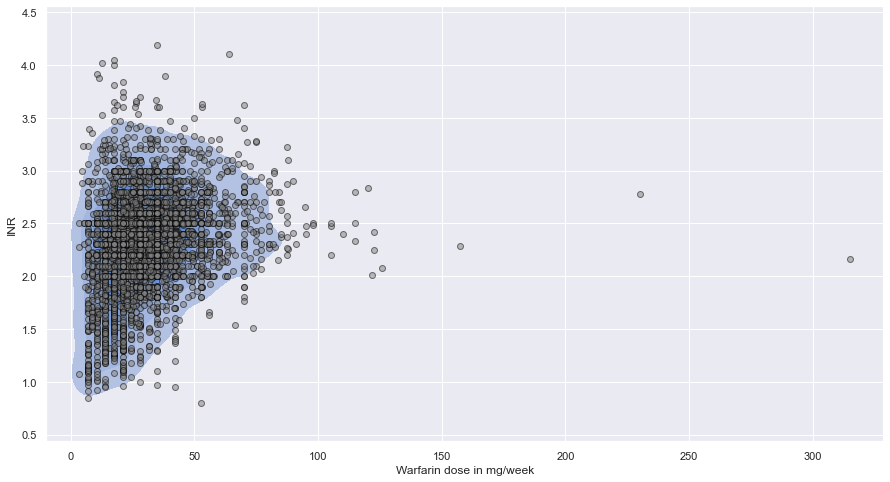

In [4]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(
    data=data, fill=True,
    x='Warfarin dose in mg/week',
    y='INR')
ax.scatter(
    data['Warfarin dose in mg/week'].values, data['INR'].values, color='grey',
    edgecolor='black', alpha=0.5)
plt.show()

There appear to be 3 extreme outliers who received more than 150 mg per week.
With only one measurement per individual, we will declare those three
individuals as out-of-scope of our analysis and exclude them from the
inference. (We will revisit them at a later point).

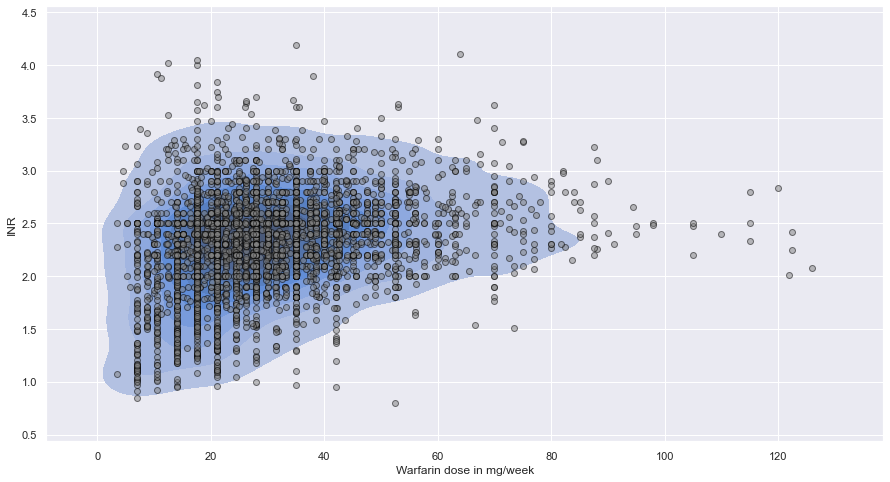

In [5]:
data_no_outliers = data.copy()

# Remove outlier 1
inr = data_no_outliers['Warfarin dose in mg/week'].max()
mask = data_no_outliers['Warfarin dose in mg/week'] != inr
data_no_outliers = data_no_outliers[mask]

# Remove outlier 2
inr = data_no_outliers['Warfarin dose in mg/week'].max()
mask = data_no_outliers['Warfarin dose in mg/week'] != inr
data_no_outliers = data_no_outliers[mask]

# Remove outlier 3
inr = data_no_outliers['Warfarin dose in mg/week'].max()
mask = data_no_outliers['Warfarin dose in mg/week'] != inr
data_no_outliers = data_no_outliers[mask]

plt.figure(figsize=(15,8))
ax = sns.kdeplot(
    data=data_no_outliers, fill=True,
    x='Warfarin dose in mg/week',
    y='INR')
ax.scatter(
    data_no_outliers['Warfarin dose in mg/week'].values,
    data_no_outliers['INR'].values, color='grey',
    edgecolor='black', alpha=0.5)
plt.show()

## Export data

To use this dataset for inference in chi we need to make a couple assumptions:

1. The INR measurements have been performed under steady state (6 days without
    change), but no time since administration is recorded. We will assume that
    after 20 days of treatment patients will have reached steady state.
2. The age is only provided in decade intervals. However, we would like to have
    a year-wise resolution of the final covariate model. So we will estimate
    the age by the mean age in the decade, assuming a uniform distribution.
3. The warfarin dose is only provided in mg/week, and it is not specified in
    which period warfarin is administered. However, clinically warfarin is
    typically administered once daily. So we will assume that the warfarin dose
    has been administered once daily 20 days prior to the measurement.
4. The CYP2C9 and VKORC1 -1639 genotypes are translated into simplified class
    labels.

In [6]:
def age_to_numeric(age):
    """
    Assuming that the patients' ages are unformly distributed within decades,
    we replace the age range by the mean age.
    """
    if age == '10 - 19':
        return 14.5
    if age == '20 - 29':
        return 24.5
    if age == '30 - 39':
        return 34.5
    if age == '40 - 49':
        return 44.5
    if age == '50 - 59':
        return 54.5
    if age == '60 - 69':
        return 64.5
    if age == '70 - 79':
        return 74.5
    if age == '80 - 89':
        return 84.5
    if age == '90+':
        return 94.5

def cyp_to_numeric(variant):
    """
    Maps CYP2C9 variants to classes according to Hamberg covariate model.

    0: 'CYP2C9 variant *1/*1'
    1: 'CYP2C9 variant *1/*2'
    2: 'CYP2C9 variant *1/*3'
    3: 'CYP2C9 variant *2/*2'
    4: 'CYP2C9 variant *2/*3'
    5: 'CYP2C9 variant *3/*3'
    """
    if variant == '*1/*1':
        return 0
    if variant == '*1/*2':
        return 1
    if variant == '*1/*3':
        return 2
    if variant == '*2/*2':
        return 3
    if variant == '*2/*3':
        return 4
    if variant == '*3/*3':
        return 5

def vkorc_to_numeric(variant):
    """
    Maps VKORC1 variants to classes according to Hamberg covariate model.

    0: 'VKORC1 variant G/G'
    1: 'VKORC1 variant A/G'
    2: 'VKORC1 variant A/A'
    """
    if variant == 'G/G':
        return 0
    if variant == 'A/G':
        return 1
    if variant == 'A/A':
        return 2

# Format data
temp = data_no_outliers.copy()
temp['Age'] = temp['Age'].apply(age_to_numeric)
temp['CYP2C9'] = temp['CYP2C9'].apply(cyp_to_numeric)
temp['VKORC1 -1639'] = temp['VKORC1 -1639'].apply(vkorc_to_numeric)

chi_df = pd.DataFrame(columns=[
    'ID', 'Time', 'Time unit', 'Observable', 'Value', 'Value unit', 'Dose',
    'Dose unit', 'Duration'])

# Add INR measurements
doses = temp['Warfarin dose in mg/week'].values / 7
ids = np.arange(start=1, stop=len(doses) + 1, dtype=int)
times = np.arange(100, dtype=int) * 24
chi_df = pd.concat([chi_df, pd.DataFrame({
    'ID': ids,
    'Time': 100 * 24,
    'Time unit': 'h',
    'Observable': 'INR',
    'Value': temp['INR'].values,
    'Value unit': 'dimensionless'
})], ignore_index=True)

# Add covariates
chi_df = pd.concat([chi_df, pd.DataFrame({
    'ID': ids,
    'Observable': 'CYP2C9 variant',
    'Value': temp['CYP2C9'].values,
    'Value unit': data_no_outliers['CYP2C9'].values
})], ignore_index=True)
chi_df = pd.concat([chi_df, pd.DataFrame({
    'ID': ids,
    'Observable': 'VKORC1 variant',
    'Value': temp['VKORC1 -1639'].values,
    'Value unit': data_no_outliers['VKORC1 -1639'].values
})], ignore_index=True)
chi_df = pd.concat([chi_df, pd.DataFrame({
    'ID': ids,
    'Observable': 'Age',
    'Value': temp['Age'].values,
    'Value unit': 'year'
})], ignore_index=True)

# Add dosing events
for time in times:
    chi_df = pd.concat([chi_df, pd.DataFrame({
        'ID': ids,
        'Time': time,
        'Time unit': 'h',
        'Dose': doses,
        'Dose unit': 'mg',
        'Duration': 0.001
    })], ignore_index=True)

# Export data
directory = os.getcwd()
chi_df.to_csv(
    directory + '/clinical_warfarin_inr_steady_state.csv', index=False)